In [1]:
# Run this cell to import all the Python packages and formatting that we need
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Functions and Apply Demo

***Created by Andrew Chen (andrew_chen04@berkeley.edu)***

## Table of Contents
1. Ages Example
   - Creating A Function
   - Working with Fake Data
   - Working with Real Data
   - Creating Another Function
2. Basketball Example
   - Creating A Function with Two Arguments
   - Apply with Two Columns
3. Live Lecture Questions

## Ages Example

- _Adapted from [Data 8 Textbook, Chapter 8.1](https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html#)_

### Creating A Function

In [2]:
def cut_off_at_100(x):
    """Return the smaller of x and 100"""
    return min(x, 100)

In [3]:
# Let's check that our function works
cut_off_at_100(17)

17

In [4]:
cut_off_at_100(117)

100

In [5]:
cut_off_at_100(100)

100

In [6]:
# What will this return?
cut_off_at_100

<function __main__.cut_off_at_100(x)>

### Working with Fake Data

In [7]:
ages = Table().with_columns(
    'Name', make_array('James', 'Kevin', 'Ciara', 'Deb', 'Kirk', 'Jenny', 'Swupnil'),
    'Age', make_array(22, 117, 52, 189, 6, 101, 132)
)
ages

Name,Age
James,22
Kevin,117
Ciara,52
Deb,189
Kirk,6
Jenny,101
Swupnil,132


In [8]:
# What will the output type be here?
ages.apply(cut_off_at_100, 'Age')

array([ 22, 100,  52, 100,   6, 100, 100])

In [9]:
# Add a new column with those values to the existing table, and check them for accuracy
ages = ages.with_column(
    'Cut Off Age', ages.apply(cut_off_at_100, 'Age')
)
ages

Name,Age,Cut Off Age
James,22,22
Kevin,117,100
Ciara,52,52
Deb,189,100
Kirk,6,6
Jenny,101,100
Swupnil,132,100


### Working with Real Data

In [10]:
# Data on heights of parents and their adult children
family_heights = Table.read_table("family_heights.csv").drop(3)
family_heights

family,father,mother,children,childNum,sex,childHeight
1,78.5,67,4,1,male,73.2
1,78.5,67,4,2,female,69.2
1,78.5,67,4,3,female,69
1,78.5,67,4,4,female,69
2,75.5,66.5,4,1,male,73.5
2,75.5,66.5,4,2,male,72.5
2,75.5,66.5,4,3,female,65.5
2,75.5,66.5,4,4,female,65.5
3,75,64,2,1,male,71
3,75,64,2,2,female,68


In [11]:
# Create a new, simplified table with what we are interested in
# using array arithmetic
parent_averages = (family_heights.column('father') + family_heights.column('mother')) / 2
heights = Table().with_columns(
    'Parent Average', parent_averages,
    'Child', family_heights.column('childHeight')
)
heights

Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


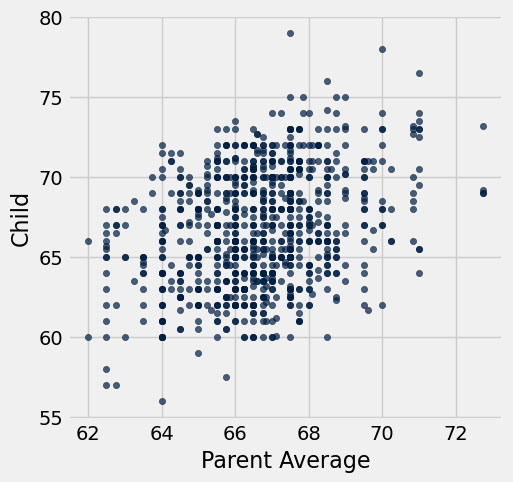

In [12]:
# Visualize our data and note any trends
# What kind of visualization would be appropriate for these data?
heights.scatter('Parent Average', 'Child')

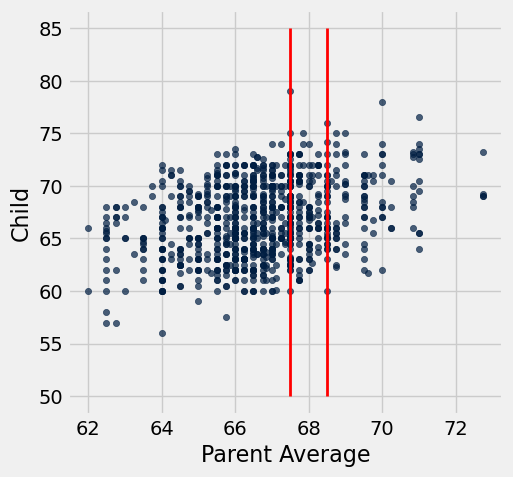

In [13]:
# We are interested in studying families with parent averages between 67.5 and 68.5 inches
heights.scatter('Parent Average', 'Child')
plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)

In [14]:
# Filter the data for them
close_to_68 = heights.where('Parent Average', are.between(67.5, 68.5))
close_to_68

Parent Average,Child
68,74
68,70
68,68
68,67
68,67
68,66
68,63.5
68,63
67.5,65
68.1,62.7


In [15]:
# Calculate the average child height for them
np.average(close_to_68.column('Child'))

67.62

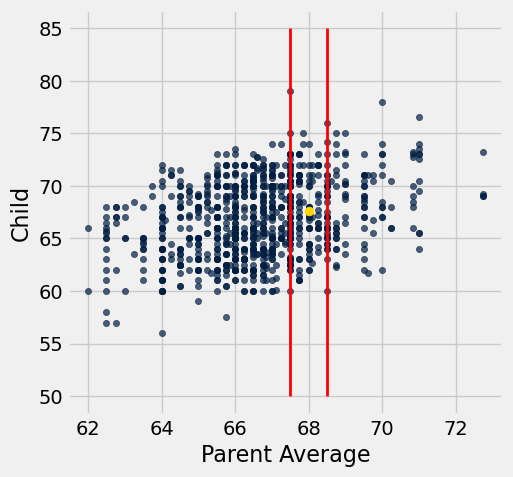

In [16]:
# Plot and check our result
heights.scatter('Parent Average', 'Child')
plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plt.scatter(68, 67.62, color='gold', s=40)

### Creating Another Function

In [17]:
def predict_child(p_avg):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5."""
    
    close_points = heights.where('Parent Average', are.between(p_avg - 0.5, p_avg + 0.5))
    return np.average(close_points.column('Child'))                     

In [18]:
# Check that our function works
predict_child(68)

67.62

In [19]:
predict_child(66)

66.08640776699029

In [20]:
# Apply predict_child to all the parent average heights, and create to a new table
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'Parent Average')
)
heights_with_predictions

Parent Average,Child,Prediction
72.75,73.2,70.1
72.75,69.2,70.1
72.75,69,70.1
72.75,69,70.1
71,73.5,70.4158
71,72.5,70.4158
71,65.5,70.4158
71,65.5,70.4158
69.5,71,68.5025
69.5,68,68.5025


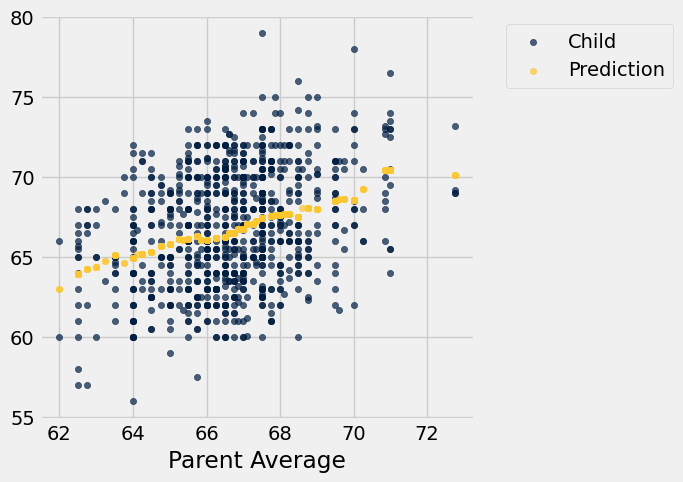

In [21]:
# Visualize our data and note any trends
heights_with_predictions.scatter('Parent Average')
# Here, we only put the x-axis argument, but the other variables' values appear on the y-axis

In [22]:
# Double check our results
predict_child(65)

65.83829787234043

## Basketball Example

### Creating A Function with Two Arguments

In [23]:
def score(count, point):
    """Compute the score given a count and a point value"""
    return count * point

In [24]:
# Check that our function works
score(9, 3)

27

### Apply with Two Columns

In [25]:
basketball = Table().with_columns(
    'distance', make_array('layup', 'dunk', 'downtown', 'free throw'),
    'count',  make_array(10, 7, 17, 4),
    'points', make_array(2, 2, 3, 1)
)
basketball

distance,count,points
layup,10,2
dunk,7,2
downtown,17,3
free throw,4,1


In [26]:
# Create a new column with the total score for each distance type
total = basketball.apply(score, 'count', 'points')
basketball = basketball.with_column('total', total)
basketball

distance,count,points,total
layup,10,2,20
dunk,7,2,14
downtown,17,3,51
free throw,4,1,4


## Live Lecture Questions